### Import

In [1]:
import numpy as np
import functions_eq_mag as fc
import functions_fatiando as ft
from timeit import default_timer as time
from scipy.interpolate import griddata
from scipy import interpolate, signal
import pickle as pickle
from matplotlib import pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

### Observed Grid and Data

In [2]:
with open('synthetic_regular_tf.pickle', 'rb') as r:
    synthetic_regular_tf = pickle.load(r)

with open('synthetic_irregular_20_tf.pickle', 'rb') as r:
    synthetic_irregular_20_tf = pickle.load(r)

with open('synthetic_irregular_30_tf.pickle', 'rb') as r:
    synthetic_irregular_30_tf = pickle.load(r)

with open('synthetic_irregular_z05_tf.pickle', 'rb') as r:
    synthetic_irregular_z05_tf = pickle.load(r)

with open('synthetic_irregular_z10_tf.pickle', 'rb') as r:
    synthetic_irregular_z10_tf = pickle.load(r)

In [3]:
xi_plot = synthetic_regular_tf['x']
yi_plot = synthetic_regular_tf['y']
zi = synthetic_regular_tf['z']
tf = synthetic_regular_tf['tf']
shape = (100, 50)
N = shape[0]*shape[1]

In [4]:
print (1)
print (np.mean(np.abs(synthetic_regular_tf['delta_tf_classical_up'])))
print (np.std(np.abs(synthetic_regular_tf['delta_tf_classical_up'])))
print()
print (np.mean(np.abs(synthetic_regular_tf['delta_tf_bccb_up'])))
print (np.std(np.abs(synthetic_regular_tf['delta_tf_bccb_up'])))
print()
print (np.mean(np.abs(synthetic_regular_tf['delta_tf_fourier_up'])))
print (np.std(np.abs(synthetic_regular_tf['delta_tf_fourier_up'])))
print()
print(2)
print (np.mean(np.abs(synthetic_irregular_20_tf['delta_tf_classical_up'])))
print (np.std(np.abs(synthetic_irregular_20_tf['delta_tf_classical_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_20_tf['delta_tf_bccb_up'])))
print (np.std(np.abs(synthetic_irregular_20_tf['delta_tf_bccb_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_20_tf['delta_tf_fourier_up'])))
print (np.std(np.abs(synthetic_irregular_20_tf['delta_tf_fourier_up'])))
print()
print(3)
print (np.mean(np.abs(synthetic_irregular_30_tf['delta_tf_classical_up'])))
print (np.std(np.abs(synthetic_irregular_30_tf['delta_tf_classical_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_30_tf['delta_tf_bccb_up'])))
print (np.std(np.abs(synthetic_irregular_30_tf['delta_tf_bccb_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_30_tf['delta_tf_fourier_up'])))
print (np.std(np.abs(synthetic_irregular_30_tf['delta_tf_fourier_up'])))
print()
print(4)
print (np.mean(np.abs(synthetic_irregular_z05_tf['delta_tf_classical_up'])))
print (np.std(np.abs(synthetic_irregular_z05_tf['delta_tf_classical_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_z05_tf['delta_tf_bccb_up'])))
print (np.std(np.abs(synthetic_irregular_z05_tf['delta_tf_bccb_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_z05_tf['delta_tf_fourier_up'])))
print (np.std(np.abs(synthetic_irregular_z05_tf['delta_tf_fourier_up'])))
print()
print(5)
print (np.mean(np.abs(synthetic_irregular_z10_tf['delta_tf_classical_up'])))
print (np.std(np.abs(synthetic_irregular_z10_tf['delta_tf_classical_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_z10_tf['delta_tf_bccb_up'])))
print (np.std(np.abs(synthetic_irregular_z10_tf['delta_tf_bccb_up'])))
print()
print (np.mean(np.abs(synthetic_irregular_z10_tf['delta_tf_fourier_up'])))
print (np.std(np.abs(synthetic_irregular_z10_tf['delta_tf_fourier_up'])))

1
0.5129872447183287
0.6532752376762093

0.6127103698030332
0.8121878115934611

2.111964597580713
2.2870379319336513

2
0.5060325485718892
0.6427463966109178

0.6764416658992406
0.8146781330986225

2.1025399061754846
2.2774444555183644

3
0.49876698216241605
0.6324465029288492

0.7476784217456383
0.779561722359454

2.111595329628038
2.276303076584544

4
0.49794370428269974
0.6380412204838178

1.5656340388818104
0.985722427465408

2.092536707493489
2.290679538309963

5
0.47916669943823015
0.6233913216941215

4.21269597900017
2.3897333435188655

2.072826834820899
2.2924569909841166


In [39]:
scale_max = np.max(synthetic_irregular_z10_tf['delta_tf_fourier_up'])
scale_min = np.min(synthetic_irregular_z10_tf['delta_tf_fourier_up'])
print (scale_min, scale_max)
scale_max = 17.
scale_min = -15.

-14.641397262955834 16.594867652112384


### Plot of the Figure 3 synthetic data

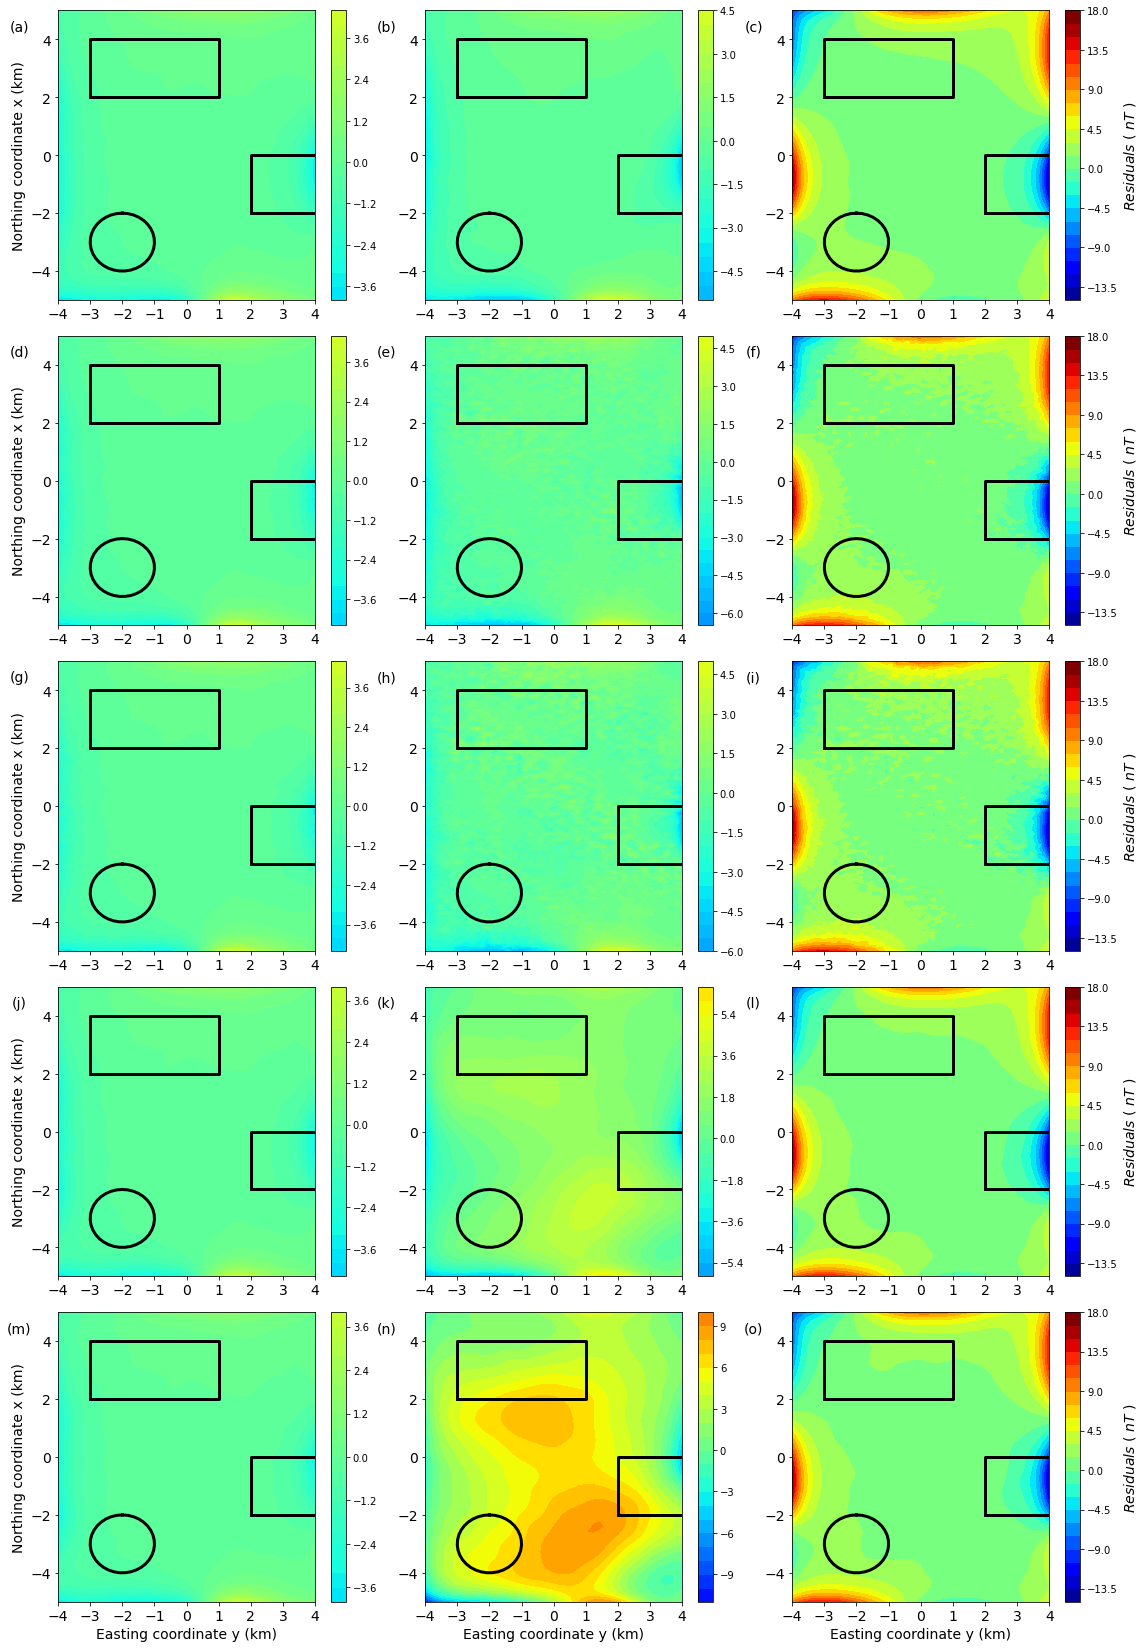

In [40]:
#Projection_model 
R = 1000 #Radius
xc, yc, zc = -3000.,-2000.,2000. #Center of sphere
phi = np.linspace(0, 2.*np.pi, 36)  #36 points
x = xc/1000 + R/1000*np.cos(phi)
y = yc/1000 + R/1000*np.sin(phi)

x_p = [-3., -3, 1, 1, -3.]
y_p = [2., 4, 4, 2, 2.]

x_p2 = [2, 2, 6, 6, 2]
y_p2 = [-2, 0, 0, -2, -2.]

fig = plt.figure(figsize=(16,23))
fig.patch.set_facecolor('xkcd:white')
plt.subplot(531)
plt.title('(a)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_regular_tf['delta_tf_classical_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(532)
plt.title('(b)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_regular_tf['delta_tf_bccb_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(533)
plt.title('(c)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_regular_tf['delta_tf_fourier_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(534)
plt.title('(d)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_20_tf['delta_tf_classical_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(535)
plt.title('(e)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_20_tf['delta_tf_bccb_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(536)
plt.title('(f)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_20_tf['delta_tf_fourier_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(537)
plt.title('(g)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_30_tf['delta_tf_classical_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(538)
plt.title('(h)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_30_tf['delta_tf_bccb_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(539)
plt.title('(i)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_30_tf['delta_tf_fourier_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(5,3,10)
plt.title('(j)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z05_tf['delta_tf_classical_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(5,3,11)
plt.title('(k)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z05_tf['delta_tf_bccb_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(5,3,12)
plt.title('(l)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z05_tf['delta_tf_fourier_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(5,3,13)
plt.title('(m)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z10_tf['delta_tf_classical_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(5,3,14)
plt.title('(n)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z10_tf['delta_tf_bccb_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
#cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.subplot(5,3,15)
plt.title('(o)', y=0.91, x=-0.15, fontsize=14)
plt.tricontourf(yi_plot, xi_plot,synthetic_irregular_z10_tf['delta_tf_fourier_up'],22,vmin=scale_min, vmax=scale_max,cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=3)
plt.plot(x_p2,y_p2,color="k", linewidth=3)
plt.plot(y, x, color="k", linewidth=3)
cb = plt.colorbar(shrink=1)
cb.set_label('$Residuals$ ( $nT$ )', rotation=90, fontsize=14)
plt.xlim(np.min(yi_plot),np.max(yi_plot))
plt.ylim(np.min(xi_plot),np.max(xi_plot))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Easting coordinate y (km)', fontsize=14)
#plt.ylabel('Northing coordinate x (km)', fontsize=14)

plt.tight_layout()
#plt.savefig('figures/synthetic_upward_residuals_comparison.png', dpi=300)